# SVM
- Supervised Machine Learning
- It separates data by drwaing a line
- Margin : gap between the two lines on the closest class points.
- Hyperplane : It is a decision plane which separates between a set of objects having different class membership.
- Support Vector : It is a data point

### SVM Kernel
- Liner
- Polynomial
- Radial Basis function

#### Building model using sklearn

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/home/ansari/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ansari/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ansari/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
from sklearn import datasets, metrics
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler

/home/ansari/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
cancer = datasets.load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
cancer.feature_names.shape

(30,)

In [7]:
x = cancer.data
y = cancer.target

In [8]:
x.shape, y.shape

((569, 30), (569,))

In [9]:
x[0:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [10]:
y #0:Malignant , 1:Benign

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

#### Standardization

In [13]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

#### Split the data and build the model

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=1, stratify=y) #stratify : Labels are equally divided

In [16]:
from sklearn import svm

/home/ansari/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Accuracy:  0.9649122807017544
Precision:  0.9594594594594594
Recall:  0.9861111111111112
Confusion Matrix


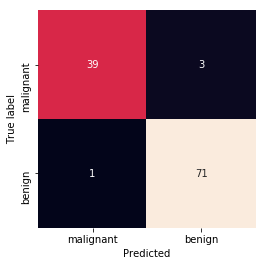

In [22]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

print("Accuracy: ", metrics.accuracy_score(y_test,y_predict))
print("Precision: ", metrics.precision_score(y_test, y_predict))
print("Recall: ", metrics.recall_score(y_test, y_predict))

print("Confusion Matrix")

mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square= True, annot=True, fmt='d', cbar=False,
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names)

plt.xlabel('Predicted')
plt.ylabel('True label')
plt.show()

In [23]:
element, count = np.unique(y_test, return_counts=True)
element, count

(array([0, 1]), array([42, 72]))

#### without Scaling

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y) #stratify : Labels are equally divided

clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

print("Accuracy: ", metrics.accuracy_score(y_test,y_predict))

Accuracy:  0.9649122807017544


#### Polynomial Kernel

Accuracy:  0.9649122807017544
Precision:  0.9594594594594594
Recall:  0.9861111111111112
Confusion Matrix


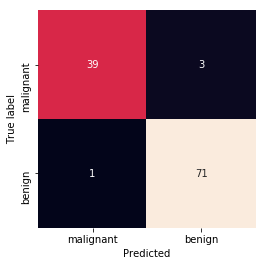

In [24]:
clf = svm.SVC(kernel='poly', degree=1, gamma=100)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

print("Accuracy: ", metrics.accuracy_score(y_test,y_predict))
print("Precision: ", metrics.precision_score(y_test, y_predict))
print("Recall: ", metrics.recall_score(y_test, y_predict))

print("Confusion Matrix")

mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square= True, annot=True, fmt='d', cbar=False,
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names)

plt.xlabel('Predicted')
plt.ylabel('True label')
plt.show()

### Sigmoid Kernel

Accuracy:  0.631578947368421
Precision:  0.631578947368421
Recall:  1.0
Confusion Matrix


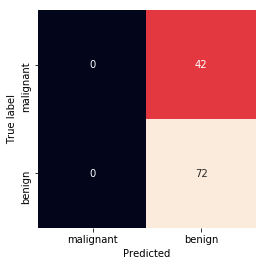

In [25]:
clf = svm.SVC(kernel='sigmoid', gamma=200, C=0.20)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

print("Accuracy: ", metrics.accuracy_score(y_test,y_predict))
print("Precision: ", metrics.precision_score(y_test, y_predict))
print("Recall: ", metrics.recall_score(y_test, y_predict))

print("Confusion Matrix")

mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square= True, annot=True, fmt='d', cbar=False,
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names)

plt.xlabel('Predicted')
plt.ylabel('True label')
plt.show()